In [1]:
%matplotlib inline

import os
import sys
import pandas as pd
import glob
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import torch
import torch.nn as nn

plt.rc('font', size = 8)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
sns.set_style("ticks")

savefigs = True
pfp = '/home/ngr4/project/dist_encoder/results/'

In [3]:
# make example distributions
# generate data

dist_type = []
set_dist = []
for i in range(1): 
    x = torch.rand(500,1)
    set_dist.append(x)
    dist_type.append('Random')

    
# for i in range(3): 
#     m = torch.distributions.beta.Beta(torch.tensor([.2]), torch.tensor([.7]))
#     x = m.sample([500])
#     set_dist.append(x)
#     dist_type.append('Beta')
    
for i in range(1): 
    m = torch.distributions.exponential.Exponential(torch.tensor([2.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Exponential')
    
# for i in range(5): 
#     m = torch.distributions.gamma.Gamma(torch.tensor([1.0]), torch.tensor([1.5]))
#     x = m.sample([500])
#     set_dist.append(x)
#     dist_type.append('Gamma')
    
# for i in range(5): 
#     m = torch.distributions.laplace.Laplace(torch.tensor([.5]), torch.tensor([1.0]))
#     x = m.sample([500])
#     set_dist.append(x)
#     dist_type.append('Laplace')
    
# for i in range(5): 
#     m = torch.distributions.log_normal.LogNormal(torch.tensor([0.0]), torch.tensor([0.5]))
#     x = m.sample([500])
#     set_dist.append(x)
#     dist_type.append('LogNormal')

    
for i in range(1): 
    m = torch.distributions.normal.Normal(torch.tensor([0.0]), torch.tensor([1.0]))
    x = m.sample([500])
    set_dist.append(x)   
    dist_type.append('Normal')
    
# for i in range(5): 
#     m = torch.distributions.studentT.StudentT(torch.tensor([2.0]))
#     x = m.sample([500])
#     set_dist.append(x)  
#     dist_type.append('StudentT')


In [17]:
pfp

'/home/ngr4/project/dist_encoder/results/'

/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/gpfs/ycga/project/dijk/ngr4/conda_envs/py385dev/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

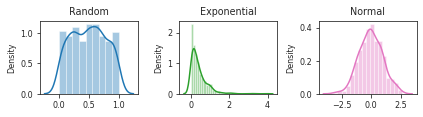

In [16]:
cmap_dist = {v:sns.color_palette()[i] for i,v in zip([0, 2, 6], 
                                                     ['Random', 'Exponential', 'Normal'])}
fig, ax = plt.subplots(1, 3, figsize=(6, 1.67))
for i, distribution in enumerate(set_dist):
    sns.distplot(distribution, ax=ax[i], color=cmap_dist[dist_type[i]])
    ax[i].set_title(dist_type[i])
fig.tight_layout()
fig.savefig(os.path.join(pfp, 'distplot_example_sets.pdf'), bbox_inches='tight')
    

In [2]:
# generate data

dist_type = []
set_dist = []
for i in range(10): 
    x = torch.rand(500,1)
    set_dist.append(x)
    dist_type.append('Random')
    
for i in range(3): 
    m = torch.distributions.beta.Beta(torch.tensor([.5]), torch.tensor([.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Beta')
    
for i in range(3): 
    m = torch.distributions.beta.Beta(torch.tensor([.7]), torch.tensor([.3]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Beta')
    
for i in range(3): 
    m = torch.distributions.beta.Beta(torch.tensor([.2]), torch.tensor([.7]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Beta')
    
for i in range(5): 
    m = torch.distributions.exponential.Exponential(torch.tensor([1.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Exponential')
    
for i in range(5): 
    m = torch.distributions.exponential.Exponential(torch.tensor([2.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Exponential')
    
for i in range(5): 
    m = torch.distributions.gamma.Gamma(torch.tensor([1.0]), torch.tensor([1.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Gamma')
    
for i in range(5): 
    m = torch.distributions.laplace.Laplace(torch.tensor([1.0]), torch.tensor([1.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Laplace')
    
for i in range(5): 
    m = torch.distributions.laplace.Laplace(torch.tensor([.5]), torch.tensor([1.0]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Laplace')
    
for i in range(5): 
    m = torch.distributions.log_normal.LogNormal(torch.tensor([0.0]), torch.tensor([0.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('LogNormal')

    
for i in range(5): 
    m = torch.distributions.normal.Normal(torch.tensor([0.0]), torch.tensor([1.0]))
    x = m.sample([500])
    set_dist.append(x)   
    dist_type.append('Normal')

for i in range(5): 
    m = torch.distributions.normal.Normal(torch.tensor([0.3]), torch.tensor([0.5]))
    x = m.sample([500])
    set_dist.append(x)  
    dist_type.append('Normal')
    
    
# for i in range(5): 
#     m = torch.distributions.studentT.StudentT(torch.tensor([2.0]))
#     x = m.sample([500])
#     set_dist.append(x)  
#     dist_type.append('StudentT')
    
set_dist = torch.stack(set_dist)

In [3]:
# models

class Set2Set(nn.Module):
    def __init__(self, input_dim, hidden_dim, act_fn=nn.Tanh, num_layers=1):
        '''
        Args:
            input_dim: input dim of Set2Set. 
            hidden_dim: the dim of set representation, which is also the INPUT dimension of 
                the LSTM in Set2Set. 
                This is a concatenation of weighted sum of embedding (dim input_dim), and the LSTM
                hidden/output (dim: self.lstm_output_dim).
        '''
        super(Set2Set, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        if hidden_dim <= input_dim:
            print('ERROR: Set2Set output_dim should be larger than input_dim')
        # the hidden is a concatenation of weighted sum of embedding and LSTM output
        self.lstm_output_dim = hidden_dim - input_dim
        self.lstm = nn.LSTM(hidden_dim, input_dim, num_layers=num_layers, batch_first=True)

        # convert back to dim of input_dim
       # self.pred = nn.Linear(hidden_dim, input_dim)
        self.pred = nn.Linear(hidden_dim,4)
        self.act = act_fn()

    def forward(self, embedding):
        '''
        Args:
            embedding: [batch_size x n x d] embedding matrix
        Returns:
            aggregated: [batch_size x d] vector representation of all embeddings
        '''
        batch_size = embedding.size()[0]
        n = embedding.size()[1]

        hidden = (torch.zeros(self.num_layers, batch_size, self.lstm_output_dim).cuda(),
                  torch.zeros(self.num_layers, batch_size, self.lstm_output_dim).cuda())

        q_star = torch.zeros(batch_size, 1, self.hidden_dim).cuda()
        for i in range(n):
            # q: batch_size x 1 x input_dim
            q, hidden = self.lstm(q_star, hidden)
            # e: batch_size x n x 1
            e = embedding @ torch.transpose(q, 1, 2)
            a = nn.Softmax(dim=1)(e)
            r = torch.sum(a * embedding, dim=1, keepdim=True)
            q_star = torch.cat((q, r), dim=2)
        q_star = torch.squeeze(q_star, dim=1)
        out = self.act(self.pred(q_star))

        return out
    
class DeepSet(nn.Module):

    def __init__(self, in_features, set_features):
        super(DeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 50),
            nn.ELU(inplace=True),
            nn.Linear(50, 100),
            nn.ELU(inplace=True),
            nn.Linear(100, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 30),
            nn.ELU(inplace=True),
            nn.Linear(30, 30),
            nn.ELU(inplace=True),
            nn.Linear(30, 10),
            nn.ELU(inplace=True),
            nn.Linear(10, 2),
        )
        
        
    def forward(self, input):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        return x
   
class Encoder(nn.Module):
    """ Set Encoder 
    """
    def __init__(self, dim_Q, dim_K, dim_V, d_model, num_heads, ln=False, skip=True):
        super(Encoder, self).__init__()
        self.dim_V = dim_V
        self.num_heads = num_heads
        self.skip = skip
       # self.s_max = s_max
        #Maximum set size
        self.d_model = d_model
        self.fc_q = nn.Linear(dim_Q, d_model)
        self.fc_k = nn.Linear(dim_K, d_model)
        self.fc_v = nn.Linear(dim_K, d_model)
        if ln:
            self.ln0 = nn.LayerNorm(d_model)
            self.ln1 = nn.LayerNorm(d_model)
        #This is the classic pointwise feedforward in "Attention is All you need"
        self.ff = nn.Sequential(
        nn.Linear(d_model, 4 * d_model),
        nn.ReLU(),
        nn.Linear(4 * d_model, d_model))
        # I have experimented with just a smaller version of this 
       # self.fc_o = nn.Linear(d_model,d_model)
        
     #   self.fc_rep = nn.Linear(s_max, 1)
    #number of heads must divide output size = d_model
        

    def forward(self, Q, K):
        Q = self.fc_q(Q)
      
        K, V = self.fc_k(K), self.fc_v(K)

        dim_split = self.d_model // self.num_heads
        Q_ = torch.cat(Q.split(dim_split, 2), 0)
        K_ = torch.cat(K.split(dim_split, 2), 0)
        V_ = torch.cat(V.split(dim_split, 2), 0)
  

        A = torch.softmax(Q_.bmm(K_.transpose(-2,-1))/math.sqrt(self.d_model), dim=-1)
        A_1 = A.bmm(V_)
        
 
        O = torch.cat((A_1).split(Q.size(0), 0), 2)
       
        O = torch.cat((Q_ + A_1).split(Q.size(0), 0), 2) if getattr(self, 'skip', True) else \
             torch.cat((A_1).split(Q.size(0), 0), 2)
        O = O if getattr(self, 'ln0', None) is None else self.ln0(O)
       # O = O + F.relu(self.fc_o(O)) if getattr(self, 'skip', None) is None else F.relu(self.fc_o(O))
        # For the classic transformers paper it is 
        O = O + self.ff(O)
        O = O if getattr(self, 'ln1', None) is None else self.ln1(O)
        O = torch.mean(O,dim=1)
#         O = pad_sequence(O, batch_first=True, padding_value=0)
#         O = O.transpose(-2,-1)
#         O = F.pad(O, (0, self.s_max- O.shape[-1]), 'constant', 0)
      #  O = self.fc_rep(O)
       # O = self.fc_rep(O.transpose(-2,-1))
      #  O = O.squeeze()

        return O
    
    
class SelfAttention(nn.Module):
    def __init__(self, dim_in=18, dim_out=8, num_heads=2, ln=True, skip=True):
        super(SelfAttention, self).__init__()
        self.Encoder = Encoder(dim_in, dim_in, dim_in, dim_out, num_heads, ln=ln, skip=skip)

    def forward(self, X):
        return self.Encoder(X, X)
    


In [4]:
# utils

eps = 1e-15
"""Approximating KL divergences between two probability densities using samples. 
    It is buggy. Use at your own peril
"""

def knn_distance(point, sample, k):
    """ Euclidean distance from `point` to it's `k`-Nearest
    Neighbour in `sample` """
    norms = np.linalg.norm(sample-point, axis=1)
    return np.sort(norms)[k]


def verify_sample_shapes(s1, s2, k):
    # Expects [N, D]
    assert(len(s1.shape) == len(s2.shape) == 2)
    # Check dimensionality of sample is identical
    assert(s1.shape[1] == s2.shape[1])


def naive_estimator(s1, s2, k=1):
    """ KL-Divergence estimator using brute-force (numpy) k-NN
        s1: (N_1,D) Sample drawn from distribution P
        s2: (N_2,D) Sample drawn from distribution Q
        k: Number of neighbours considered (default 1)
        return: estimated D(P|Q)
    """
    verify_sample_shapes(s1, s2, k)

    n, m = len(s1), len(s2)
    D = np.log(m / (n - 1))
    d = float(s1.shape[1])

    for p1 in s1:
        nu = knn_distance(p1, s2, k-1)  # -1 because 'p1' is not in 's2'
        rho = knn_distance(p1, s1, k)
        D += (d/n)*np.log((nu/rho)+eps)
    return D


def scipy_estimator(s1, s2, k=1):
    """ KL-Divergence estimator using scipy's KDTree
        s1: (N_1,D) Sample drawn from distribution P
        s2: (N_2,D) Sample drawn from distribution Q
        k: Number of neighbours considered (default 1)
        return: estimated D(P|Q)
    """
    verify_sample_shapes(s1, s2, k)

    n, m = len(s1), len(s2)
    d = float(s1.shape[1])
    D = np.log(m / (n - 1))

    nu_d,  nu_i   = KDTree(s2).query(s1, k)
    rho_d, rhio_i = KDTree(s1).query(s1, k+1)

    # KTree.query returns different shape in k==1 vs k > 1
    if k > 1:
        D += (d/n)*np.sum(np.log(nu_d[::, -1]/rho_d[::, -1]))
    else:
        D += (d/n)*np.sum(np.log(nu_d/rho_d[::, -1]))

    return D


def skl_estimator(s1, s2, k=1):
    """ KL-Divergence estimator using scikit-learn's NearestNeighbours
        s1: (N_1,D) Sample drawn from distribution P
        s2: (N_2,D) Sample drawn from distribution Q
        k: Number of neighbours considered (default 1)
        return: estimated D(P|Q)
    """
    verify_sample_shapes(s1, s2, k)

    n, m = len(s1), len(s2)
    d = float(s1.shape[1])
    D = np.log(m / (n - 1))

    s1_neighbourhood = NearestNeighbors(k+1, 10).fit(s1)
    s2_neighbourhood = NearestNeighbors(k, 10).fit(s2)

    for p1 in s1:
        s1_distances, indices = s1_neighbourhood.kneighbors([p1], k+1)
        s2_distances, indices = s2_neighbourhood.kneighbors([p1], k)
        rho = s1_distances[0][-1]
        nu = s2_distances[0][-1]
        D += (d/n)*np.log(nu/rho)
    return D


# List of all estimators
Estimators = [naive_estimator, scipy_estimator, skl_estimator]


class SinkhornDistance(nn.Module):
    r"""
    Given two empirical measures each with :math:`P_1` locations
    :math:`x\in\mathbb{R}^{D_1}` and :math:`P_2` locations :math:`y\in\mathbb{R}^{D_2}`,
    outputs an approximation of the regularized OT cost for point clouds.
    Args:
        eps (float): regularization coefficient
        max_iter (int): maximum number of Sinkhorn iterations
        reduction (string, optional): Specifies the reduction to apply to the output:
            'none' | 'mean' | 'sum'. 'none': no reduction will be applied,
            'mean': the sum of the output will be divided by the number of
            elements in the output, 'sum': the output will be summed. Default: 'none'
    Shape:
        - Input: :math:`(N, P_1, D_1)`, :math:`(N, P_2, D_2)`
        - Output: :math:`(N)` or :math:`()`, depending on `reduction`
    """
    def __init__(self, eps, max_iter, reduction='none'):
        super(SinkhornDistance, self).__init__()
        self.eps = eps
        self.max_iter = max_iter
        self.reduction = reduction

    def forward(self, x, y):
        # The Sinkhorn algorithm takes as input three variables :
        C = self._cost_matrix(x, y)  # Wasserstein cost function
        x_points = x.shape[-2]
        y_points = y.shape[-2]
        if x.dim() == 2:
            batch_size = 1
        else:
            batch_size = x.shape[0]

        # both marginals are fixed with equal weights
        mu = torch.empty(batch_size, x_points, dtype=torch.float,
                         requires_grad=False).fill_(1.0 / x_points).to(device).squeeze()
        nu = torch.empty(batch_size, y_points, dtype=torch.float,
                         requires_grad=False).fill_(1.0 / y_points).to(device).squeeze()

        u = torch.zeros_like(mu).to(device)
        v = torch.zeros_like(nu).to(device)
        # To check if algorithm terminates because of threshold
        # or max iterations reached
        actual_nits = 0
        # Stopping criterion
        thresh = 1e-1

        # Sinkhorn iterations
        for i in range(self.max_iter):
            u1 = u  # useful to check the update
            u = self.eps * (torch.log(mu+1e-8) - torch.logsumexp(self.M(C, u, v), dim=-1)) + u
            v = self.eps * (torch.log(nu+1e-8) - torch.logsumexp(self.M(C, u, v).transpose(-2, -1), dim=-1)) + v
            err = (u - u1).abs().sum(-1).mean()

            actual_nits += 1
            if err.item() < thresh:
                break

        U, V = u, v
        # Transport plan pi = diag(a)*K*diag(b)
        pi = torch.exp(self.M(C, U, V))
        # Sinkhorn distance
        cost = torch.sum(pi * C, dim=(-2, -1))

        if self.reduction == 'mean':
            cost = cost.mean()
        elif self.reduction == 'sum':
            cost = cost.sum()

      #  return cost, pi, C
        return cost

    def M(self, C, u, v):
        "Modified cost for logarithmic updates"
        "$M_{ij} = (-c_{ij} + u_i + v_j) / \epsilon$"
        return (-C + u.unsqueeze(-1) + v.unsqueeze(-2)) / self.eps

    @staticmethod
    def _cost_matrix(x, y, p=1):
        "Returns the matrix of $|x_i-y_j|^p$."
        x_col = x.unsqueeze(-2)
        y_lin = y.unsqueeze(-3)
        C = torch.sum((torch.abs(x_col - y_lin)) ** p, -1)
        return C

    @staticmethod
    def ave(u, u1, tau):
        "Barycenter subroutine, used by kinetic acceleration through extrapolation."
        return tau * u + (1 - tau) * u1

In [5]:
# initialize

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DeepSet(1, 36).to(device)
sinkhorn = SinkhornDistance(eps=0.1, max_iter=100, reduction=None).to(device)

model.load_state_dict(torch.load(os.path.join('/home/ngr4/project/dist_encoder/notebooks_and_pkl/', 'deepset_dist_flat6.pkl')))
model.eval()

DeepSet(
  (feature_extractor): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=50, out_features=100, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=100, out_features=36, bias=True)
  )
  (regressor): Sequential(
    (0): Linear(in_features=36, out_features=30, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=30, out_features=10, bias=True)
    (5): ELU(alpha=1.0, inplace=True)
    (6): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [374]:
results = pd.DataFrame()
euclidean_dist = []
wass_dist = []
dist_comparison = []

tic = time.time()
for i in range(len(set_dist)):
    for j in range(i+1,len(set_dist)):

        euclidean_dist.append((torch.norm(model(set_dist[i, :, :].view(1, -1, 1))-model(set_dist[j, :, :].view(1, -1, 1)), p=2)).item())
        wass_dist.append((sinkhorn(set_dist[i, :, :].view(1, -1, 1), set_dist[j, :, :].view(1, -1, 1))).item())
        dist_comparison.append('{}-{}'.format(dist_type[i], dist_type[j]))
    
    if i%50==0 and i!=0:
        print('... through {} iterations\t{:.2f}-s elapsed'.format(i+1, time.time()-tic))
        results = pd.DataFrame()
        results['Euclidean distance'] = euclidean_dist
        results['Wasserstein distance'] = wass_dist
        results['Comparisons'] = dist_comparison
        results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_flat6.csv'))

# store results
results = pd.DataFrame()
results['Euclidean distance'] = euclidean_dist
results['Wasserstein distance'] = wass_dist
results['Comparisons'] = dist_comparison
results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_flat6.csv'))
        

... through 51 iterations	84.72-s elapsed


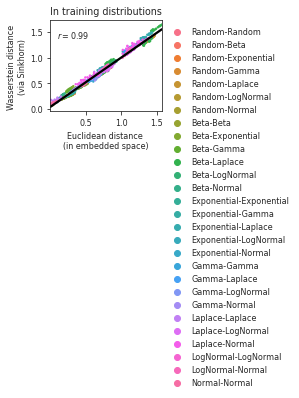

In [387]:
# visualize comparisons
fname = 'flat6'
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x='Euclidean distance',
                y='Wasserstein distance',
                hue='Comparisons',
                data=results,
                linewidth=0,
                s=6,
                alpha=1,
                ax=ax,
                rasterized=True)
sns.regplot(x='Euclidean distance', 
            y='Wasserstein distance', 
            data=results, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

# correlation
r, p = stats.pearsonr(results['Euclidean distance'], results['Wasserstein distance'])
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.set_title('In training distributions')
ax.set_ylabel('Wasserstein distance \n(via Sinkhorn)', ha='center')
ax.set_xlabel('Euclidean distance \n(in embedded space)', ha='center')


if savefigs:
    fig.savefig(os.path.join(pfp, 'corr_plot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

# Experiments

## Translation

Add a constant to each distribution

In [12]:
fname = 'tranlsation'

results = pd.DataFrame()
euclidean_dist = []
euclidean_dist_trans = []
dist_comparison = []

tic = time.time()
for i in range(len(set_dist)):
    for j in range(i+1,len(set_dist)):
        
        xprime = torch.rand(1)

        euclidean_dist.append((torch.norm(model(set_dist[i, :, :].view(1, -1, 1))-model(set_dist[j, :, :].view(1, -1, 1)), p=2)).item())
        euclidean_dist_trans.append((torch.norm(model(set_dist[i, :, :].view(1, -1, 1)+xprime)-model(set_dist[j, :, :].view(1, -1, 1)+xprime), p=2)).item())
        dist_comparison.append('{}-{}'.format(dist_type[i], dist_type[j]))
    
    if i%50==0 and i!=0:
        print('... through {} iterations\t{:.2f}-s elapsed'.format(i+1, time.time()-tic))
        results = pd.DataFrame()
        results['Euclidean distance'] = euclidean_dist
        results['Translated Euclidean distance'] = euclidean_dist_trans
        results['Comparisons'] = dist_comparison
        results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_{}.csv'.format(fname)))

# store results
results = pd.DataFrame()
results['Euclidean distance'] = euclidean_dist
results['Translated Euclidean distance'] = euclidean_dist_trans
results['Comparisons'] = dist_comparison
results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_{}.csv'.format(fname)))
        

... through 51 iterations	4.01-s elapsed


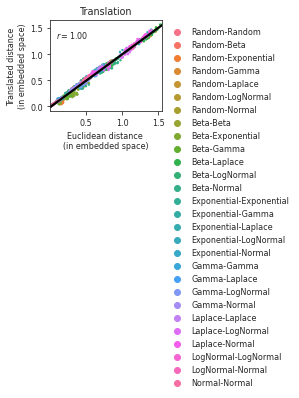

In [13]:
# visualize comparisons
fname = 'Translation'
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x='Euclidean distance',
                y='Translated Euclidean distance',
                hue='Comparisons',
                data=results,
                linewidth=0,
                s=6,
                alpha=1,
                ax=ax,
                rasterized=True)
sns.regplot(x='Euclidean distance', 
            y='Translated Euclidean distance', 
            data=results, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)

# correlation
r, p = stats.pearsonr(results['Euclidean distance'], results['Translated Euclidean distance'])
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.legend(bbox_to_anchor=(1,1))
ax.set_title(fname)
ax.set_ylabel('Translated distance\n(in embedded space)', ha='center')
ax.set_xlabel('Euclidean distance \n(in embedded space)', ha='center')

if savefigs:
    fig.savefig(os.path.join(pfp, 'corr_plot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

In [78]:
# store dist_pal to match color scheme
dist_pal = {v:sns.color_palette('husl', n_colors=len(np.unique(dist_comparison)))[i] for i,v in enumerate(np.array(dist_comparison)[np.sort(np.unique(dist_comparison, return_index=True)[1])].tolist())}

## visualize encoded space 

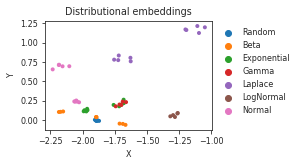

In [430]:
# visualize comparisons
fname = 'Distributional embeddings'
xy = np.empty((len(set_dist), 2))
for i in range(len(set_dist)): 
    xy[i, :] = model(set_dist[i, :, :].view(1, -1, 1)).detach().numpy()
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.scatterplot(x=xy[:,0],
                y=xy[:,1],
                hue=dist_type,
                linewidth=0,
                s=16,
                alpha=1,
                ax=ax,
                rasterized=True)

ax.legend(bbox_to_anchor=(1,1))
ax.set_title(fname)
ax.set_ylabel('Y', ha='center')
ax.set_xlabel('X', ha='center')

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

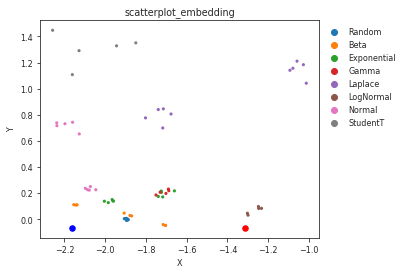

In [129]:
# visualize comparisons
dirac_pt = model(torch.ones(1, 500, 1)*0.5)
normal_pt
normal_pt2

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.scatterplot(x=xy[:,0],
                y=xy[:,1],
                hue=dist_type,
                linewidth=0,
                s=10,
                alpha=1,
                ax=ax,
                rasterized=True)
ax.scatter(normal_pt.detach()[:,0], dirac_pt.detach()[:,1], color='r', s=30)
ax.scatter(normal_pt2.detach()[:,0], dirac_pt.detach()[:,1], color='b', s=30)
ax.legend(bbox_to_anchor=(1,1))
ax.set_title(fname)
ax.set_ylabel('Y', ha='center')
ax.set_xlabel('X', ha='center')

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

No handles with labels found to put in legend.


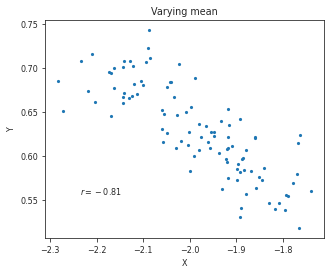

In [411]:
# visualize comparisons
fname = 'Varying mean'
n = 100
xy = np.empty((n, 2))
for i in range(n):
    mu = torch.rand(1)*0.5
    xy[i, :] = model(torch.distributions.normal.Normal(mu, 1).sample([500]).view(1, -1, 1)).detach().numpy()
    
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.scatterplot(x=xy[:,0],
                y=xy[:,1],
#                 hue=dist_type,
                linewidth=0,
                s=10,
                alpha=1,
                ax=ax,
                rasterized=True)

# correlation
r, p = stats.pearsonr(xy[:,0], xy[:,1])
ax.text(0.2,0.2,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.legend(bbox_to_anchor=(1,1))
ax.set_title(fname)
ax.set_ylabel('Y', ha='center')
ax.set_xlabel('X', ha='center')

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

No handles with labels found to put in legend.


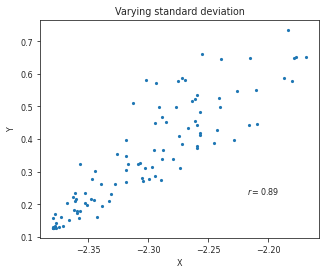

In [413]:
# visualize comparisons
fname = 'Varying standard deviation'
n = 100
xy = np.empty((n, 2))
for i in range(n):
    sigma = torch.rand(1)
    xy[i, :] = model(torch.distributions.normal.Normal(0, sigma).sample([500]).view(1, -1, 1)).detach().numpy()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.scatterplot(x=xy[:,0],
                y=xy[:,1],
#                 hue=dist_type,
                linewidth=0,
                s=10,
                alpha=1,
                ax=ax,
                rasterized=True)

# correlation
r, p = stats.pearsonr(xy[:,0], xy[:,1])
ax.text(0.8,0.2,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.legend(bbox_to_anchor=(1,1))
ax.set_title(fname)
ax.set_ylabel('Y', ha='center')
ax.set_xlabel('X', ha='center')

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

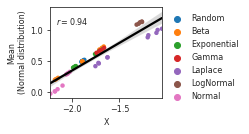

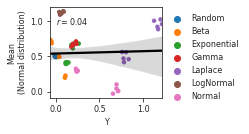

In [426]:
fname = 'Varying means'

euclidean_dist = []
euclidean_dist_trans = []
dist_comparison = []

mus = []
xy = np.empty((len(set_dist), 2))
for i in range(len(set_dist)):
    mus.append(set_dist[i, :, :].mean().item())
    xy[i, :] = model(set_dist[i, :, :].view(1, -1, 1)).detach().numpy()


# X
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x=xy[:,0],
                y=mus, 
                ax=ax,
                hue=dist_type,
                linewidth=0,
                s=20)

# correlation
r, p = stats.pearsonr(xy[:,0], mus)
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Mean\n(Normal distribution)', ha='center')
ax.set_xlabel('X')

sns.regplot(x=xy[:,0], 
            y=mus, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_X_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')
    
# Y    
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x=xy[:,1],
                y=mus, 
                ax=ax,
                hue=dist_type,
                linewidth=0,
                s=20)

# correlation
r, p = stats.pearsonr(xy[:,1], mus)
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Mean\n(Normal distribution)', ha='center')
ax.set_xlabel('Y')

sns.regplot(x=xy[:,1], 
            y=mus, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_Y_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

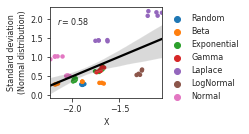

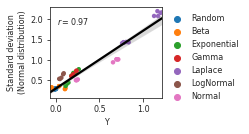

In [427]:
fname = 'Varying standard deviations'

sigmas = []
xy = np.empty((len(set_dist), 2))
for i in range(len(set_dist)):
    sigmas.append(set_dist[i, :, :].std().item())
    xy[i, :] = model(set_dist[i, :, :].view(1, -1, 1)).detach().numpy()


# X
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x=xy[:,0],
                y=sigmas, 
                ax=ax,
                hue=dist_type,
                linewidth=0,
                s=20)

# correlation
r, p = stats.pearsonr(xy[:,0], sigmas)
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Standard deviation\n(Normal distribution)', ha='center')
ax.set_xlabel('X')

sns.regplot(x=xy[:,0], 
            y=sigmas, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_X_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')
    
# Y    
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x=xy[:,1],
                y=sigmas, 
                ax=ax,
                hue=dist_type,
                linewidth=0,
                s=20)

# correlation
r, p = stats.pearsonr(xy[:,1], sigmas)
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Standard deviation\n(Normal distribution)', ha='center')
ax.set_xlabel('Y')

sns.regplot(x=xy[:,1], 
            y=sigmas, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)

if savefigs:
    fig.savefig(os.path.join(pfp, 'scatterplotplot_Y_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

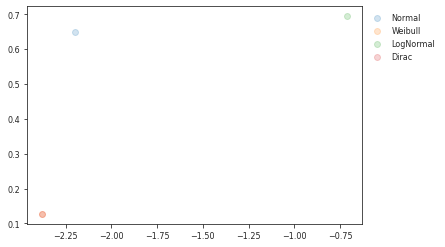

In [160]:
x1 = model(torch.distributions.normal.Normal(0,1).sample([500]).view(1,-1,1))
x2 = model(torch.distributions.weibull.Weibull(0,1).sample([500]).view(1,-1,1))
x3 = model(torch.distributions.log_normal.LogNormal(0,1).sample([500]).view(1,-1,1))
x4 = model(torch.ones(1,500,1)*0)

plt.scatter(x1.detach()[:,0], x1.detach()[:,1], alpha=0.2, label='Normal')
plt.scatter(x2.detach()[:,0], x2.detach()[:,1], alpha=0.2, label='Weibull')
plt.scatter(x3.detach()[:,0], x3.detach()[:,1], alpha=0.2,  label='LogNormal')
plt.scatter(x4.detach()[:,0], x4.detach()[:,1], alpha=0.2,  label='Dirac')
plt.legend(bbox_to_anchor=(1,1))


## Out-of-training-density

In [81]:
# generate data

dist_type = []
set_dist = []

    
for i in range(3): 
    m = torch.distributions.beta.Beta(torch.tensor([.4]), torch.tensor([0.4]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Beta')
    
for i in range(3): 
    m = torch.distributions.beta.Beta(torch.tensor([0.1]), torch.tensor([.6]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Beta')

for i in range(5): 
    m = torch.distributions.exponential.Exponential(torch.tensor([1.]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Exponential')
    
for i in range(5): 
    m = torch.distributions.exponential.Exponential(torch.tensor([0.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Exponential')
    
for i in range(5): 
    m = torch.distributions.gamma.Gamma(torch.tensor([0.5]), torch.tensor([1.]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Gamma')
    
for i in range(5): 
    m = torch.distributions.laplace.Laplace(torch.tensor([0.7]), torch.tensor([0.5]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('Laplace')
    
for i in range(5): 
    m = torch.distributions.log_normal.LogNormal(torch.tensor([0.5]), torch.tensor([1.]))
    x = m.sample([500])
    set_dist.append(x)
    dist_type.append('LogNormal')

    
for i in range(5): 
    m = torch.distributions.normal.Normal(torch.tensor([0.5]), torch.tensor([0.7]))
    x = m.sample([500])
    set_dist.append(x)   
    dist_type.append('Normal')
    
    
# for i in range(5): 
#     m = torch.distributions.studentT.StudentT(torch.tensor([1.0]))
#     x = m.sample([500])
#     set_dist.append(x)  
#     dist_type.append('StudentT')
    
set_dist = torch.stack(set_dist)

In [82]:
fname = 'out_of_density'

results = pd.DataFrame()
euclidean_dist = []
wass_dist = []
dist_comparison = []

tic = time.time()
for i in range(len(set_dist)):
    for j in range(i+1,len(set_dist)):

        euclidean_dist.append((torch.norm(model(set_dist[i, :, :].view(1, -1, 1))-model(set_dist[j, :, :].view(1, -1, 1)), p=2)).item())
        wass_dist.append((sinkhorn(set_dist[i, :, :].view(1, -1, 1), set_dist[j, :, :].view(1, -1, 1))).item())
        dist_comparison.append('{}-{}'.format(dist_type[i], dist_type[j]))
    
    if i%50==0 and i!=0:
        print('... through {} iterations\t{:.2f}-s elapsed'.format(i+1, time.time()-tic))
        results = pd.DataFrame()
        results['Euclidean distance'] = euclidean_dist
        results['Wasserstein distance'] = wass_dist
        results['Comparisons'] = dist_comparison
        results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_{}.csv'.format(fname)))

# store results
results = pd.DataFrame()
results['Euclidean distance'] = euclidean_dist
results['Wasserstein distance'] = wass_dist
results['Comparisons'] = dist_comparison
results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_{}.csv'.format(fname)))
        

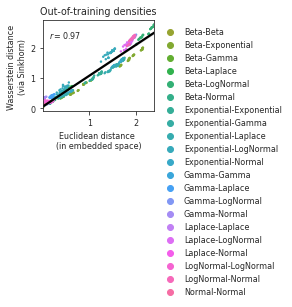

In [83]:
# visualize comparisons
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x='Euclidean distance',
                y='Wasserstein distance',
                hue='Comparisons',
                data=results,
                palette=dist_pal,
                linewidth=0,
                s=6,
                alpha=1,
                ax=ax,
                rasterized=True)
sns.regplot(x='Euclidean distance', 
            y='Wasserstein distance', 
            data=results, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Out-of-training densities')

# correlation
r, p = stats.pearsonr(results['Euclidean distance'], results['Wasserstein distance'])
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.set_ylabel('Wasserstein distance \n(via Sinkhorn)', ha='center')
ax.set_xlabel('Euclidean distance \n(in embedded space)', ha='center')

if savefigs:
    fig.savefig(os.path.join(pfp, 'corr_plot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

## sigma --> dirac point

In [6]:
# generate data

dist_type = []
set_dist = []

for sigma in np.linspace(0, 1, 100):
    m = torch.distributions.normal.Normal(torch.tensor([0.0]), torch.tensor([sigma]))
    x = m.sample([500])
    set_dist.append(x) 

    
set_dist = torch.stack(set_dist)

In [12]:
dirac_pt = model(torch.zeros((1, 500, 1))).detach().numpy()
xy = model(set_dist).detach().numpy()

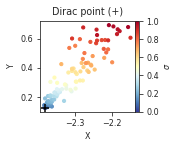

In [23]:
fig, ax = plt.subplots(1,1, figsize=(2, 1.67))
im = ax.scatter(xy[:, 0], xy[:, 1], c=np.linspace(0, 1, 100), cmap='RdYlBu_r', s=10)
fig.colorbar(im, pad=0, label='$\sigma$')
ax.scatter(dirac_pt[:, 0], dirac_pt[:, 1], color='black', marker='+', s=50)
ax.set_title('Dirac point (+)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.savefig(os.path.join(pfp, 'scatterplot_dirac_pt.pdf'), bbox_inches='tight')

# 2d

## corr plot

In [179]:
# load 2D model
model = DeepSet(2, 36).to(device)

checkpoint = torch.load('/home/ngr4/project/dist_encoder/notebooks_and_pkl/normal_2D_flat2.pt')
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

DeepSet(
  (feature_extractor): Sequential(
    (0): Linear(in_features=2, out_features=50, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=50, out_features=100, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=100, out_features=36, bias=True)
  )
  (regressor): Sequential(
    (0): Linear(in_features=36, out_features=30, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=30, out_features=10, bias=True)
    (5): ELU(alpha=1.0, inplace=True)
    (6): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [189]:
set_dist = []
dist_type = []

for i in range(5): 
    m = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))
    x = m.sample([250])
    set_dist.append(x) 
    dist_type.append('Normal')
    
for i in range(5): 
    m = torch.distributions.multivariate_normal.MultivariateNormal(torch.tensor([0.0, 1.0]), torch.tensor([[1,.5],[.5,1]]))
    x = m.sample([250])
    set_dist.append(x)
    dist_type.append('Normal')
    
for i in range(5): 
    m = torch.distributions.multivariate_normal.MultivariateNormal(torch.ones(2), covariance_matrix=torch.tensor([[.7,.1],[.1,1]]))
    x = m.sample([250])
    set_dist.append(x) 
    dist_type.append('Normal')
    
for i in range(5): 
    m = torch.distributions.multivariate_normal.MultivariateNormal(torch.tensor([1.0, 0.0]), torch.tensor([[.2, -.1], [-.1, 1]]))
    x = m.sample([250])
    set_dist.append(x) 
    dist_type.append('Normal')
    
for i in range(5): 
    m = torch.distributions.multivariate_normal.MultivariateNormal(torch.tensor([.5, .5]), torch.tensor([[.8,.4],[.4,1]]))
    x = m.sample([250])
    set_dist.append(x) 
    dist_type.append('Normal')
    
for i in range(5): 
    m = torch.distributions.multivariate_normal.MultivariateNormal(torch.tensor([-.25, -.5]), torch.eye(2)*.5)
    x = m.sample([250])
    set_dist.append(x) 
    dist_type.append('Normal')
    
set_dist = torch.stack(set_dist)

In [190]:
fname = '2D distributions'

results = pd.DataFrame()
euclidean_dist = []
wass_dist = []
dist_comparison = []

tic = time.time()
for i in range(len(set_dist)):
    for j in range(i+1,len(set_dist)):

        euclidean_dist.append((torch.norm(model(set_dist[i, :, :].view(1, -1, 2))-model(set_dist[j, :, :].view(1, -1, 2)), p=2)).item())
        wass_dist.append((sinkhorn(set_dist[i, :, :].view(1, -1, 2), set_dist[j, :, :].view(1, -1, 2))).item())
        dist_comparison.append('{}-{}'.format(dist_type[i], dist_type[j]))
    
    if i%50==0 and i!=0:
        print('... through {} iterations\t{:.2f}-s elapsed'.format(i+1, time.time()-tic))
        results = pd.DataFrame()
        results['Euclidean distance'] = euclidean_dist
        results['Wasserstein distance'] = wass_dist
        results['Comparisons'] = dist_comparison
        results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_{}.csv'.format(fname)))

# store results
results = pd.DataFrame()
results['Euclidean distance'] = euclidean_dist
results['Wasserstein distance'] = wass_dist
results['Comparisons'] = dist_comparison
results.to_csv(os.path.join('/home/ngr4/project/dist_encoder/results/', 'results_{}.csv'.format(fname)))
        

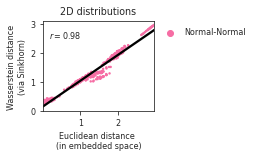

In [191]:
# visualize comparisons
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sns.scatterplot(x='Euclidean distance',
                y='Wasserstein distance',
                hue='Comparisons',
                data=results,
                linewidth=0,
                s=6,
                palette=dist_pal,
                alpha=1,
                ax=ax,
                rasterized=True)
sns.regplot(x='Euclidean distance', 
            y='Wasserstein distance', 
            data=results, 
            x_estimator=None, x_bins=None, x_ci='ci', scatter=False, fit_reg=True, ci=95, 
            n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, 
            logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, 
            label=None, color='k', marker='o', scatter_kws=None, line_kws=None, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

# correlation
r, p = stats.pearsonr(results['Euclidean distance'], results['Wasserstein distance'])
ax.text(0.2,0.8,'$r={:.2f}$'.format(r), transform=ax.transAxes, ha='center')

ax.set_title(fname)
ax.set_ylabel('Wasserstein distance \n(via Sinkhorn)', ha='center')
ax.set_xlabel('Euclidean distance \n(in embedded space)', ha='center')


if savefigs:
    fig.savefig(os.path.join(pfp, 'corr_plot_{}.pdf'.format(fname)), dpi=600, bbox_inches='tight')

## circle thingy

In [86]:
m = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2)*0.5).sample([250]).view(1, -1, 2)
mprime = m + torch.tensor([0.5, 0.5])#torch.rand(1, 2)

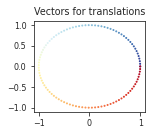

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
ax.scatter(x, y, s=1, c=counter, cmap='RdYlBu_r')
ax.set_title('Vectors for translations')
# ax.set_xlabel("x")
# ax.set_ylabel("y")
fig.savefig(os.path.join(pfp, 'scatterplot_vectors_for_2d_translations.pdf'), bbox_inches='tight')

<ipython-input-115-d74cde3464d7>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(os.path.join(pfp, 'scatterplot_2d_translations.pdf'), bbox_to_inches='tight')


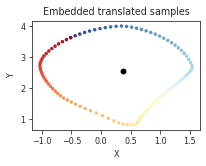

In [115]:
r = 1
n = 100
randoms = np.linspace(0,2*np.pi,n)
x,y = r*np.cos(randoms), r*np.sin(randoms)

xy = np.empty((len(randoms), 2))
counter = []
for i in range(len(randoms)):
    counter.append(i)
    xy[i, :] = model(m+torch.tensor([x[i],y[i]], dtype=torch.float)).detach().numpy()
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.scatter(model(m).detach()[:, 0][0], model(m).detach()[:, 1], color='k', s=24)
ax.scatter(xy[:, 0], xy[:, 1], c=counter, cmap='RdYlBu_r', s=6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Embedded translated samples')
fig.savefig(os.path.join(pfp, 'scatterplot_2d_translations.pdf'), bbox_to_inches='tight')

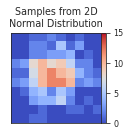

In [173]:
fig, ax = plt.subplots(1,1,figsize=(2, 1.67))
H, xbins, ybins = np.histogram2d(m[:, :, 0].view(-1).numpy(), m[:, :, 1].view(-1).numpy(), bins=10)
im = ax.imshow(H, origin='lower', cmap='coolwarm', 
               vmin=0, vmax=15)
ax.set_xticks([])
ax.set_yticks([])
fig.colorbar(im,  pad=0, )
ax.set_title('Samples from 2D\nNormal Distribution', ha='center')
if savefigs:
    fig.savefig(os.path.join(pfp, 'imshow_no_translation.pdf'))

1.0 -2.4492935982947064e-16


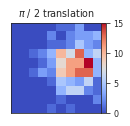

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sample = m + torch.tensor([0,1], dtype=torch.float)
print(x[-1], y[-1])
im = ax.imshow(np.histogram2d(sample[:, :, 0].view(-1).numpy(), sample[:, :, 1].view(-1).numpy(),
                          [xbins, ybins])[0],
           origin='lower', cmap='coolwarm', 
               vmin=0, vmax=15)
fig.colorbar(im,  pad=0,)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('$\pi$ / 2 translation')
if savefigs:
    fig.savefig(os.path.join(pfp, 'imshow_0.5pi_translation.pdf'))

1.0 -2.4492935982947064e-16


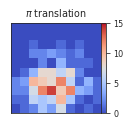

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sample = m + torch.tensor([-1,0], dtype=torch.float)
print(x[-1], y[-1])
im = ax.imshow(np.histogram2d(sample[:, :, 0].view(-1).numpy(), sample[:, :, 1].view(-1).numpy(),
                          [xbins, ybins])[0],
           origin='lower', cmap='coolwarm',
               vmin=0, vmax=15)
fig.colorbar(im,  pad=0, )
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('$\pi$ translation')
if savefigs:
    fig.savefig(os.path.join(pfp, 'imshow_pi_translation.pdf'))

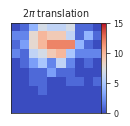

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(2, 1.67))
sample = m + torch.tensor([1,0], dtype=torch.float)
im = ax.imshow(np.histogram2d(sample[:, :, 0].view(-1).numpy(), sample[:, :, 1].view(-1).numpy(),
                          [xbins, ybins])[0],
           origin='lower', cmap='coolwarm',
               vmin=0, vmax=15)
fig.colorbar(im,  pad=0, )
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('2$\pi$ translation')
if savefigs:
    fig.savefig(os.path.join(pfp, 'imshow_2pi_translation.pdf'))

## 1D barycenter

In [327]:
# initialize 1d model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DeepSet(1, 36).to(device)
sinkhorn = SinkhornDistance(eps=0.1, max_iter=100, reduction=None).to(device)

model.load_state_dict(torch.load(os.path.join('/home/ngr4/project/dist_encoder/notebooks_and_pkl/', 'deepset_dist_flat6.pkl')))
model.eval()

DeepSet(
  (feature_extractor): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=50, out_features=100, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=100, out_features=36, bias=True)
  )
  (regressor): Sequential(
    (0): Linear(in_features=36, out_features=30, bias=True)
    (1): ELU(alpha=1.0, inplace=True)
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ELU(alpha=1.0, inplace=True)
    (4): Linear(in_features=30, out_features=10, bias=True)
    (5): ELU(alpha=1.0, inplace=True)
    (6): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [364]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity  # display as density curves
import torch
from geomloss import SamplesLoss

In [365]:
N, M = (100, 100)
t_i = torch.linspace(0, 1, M).view(-1,1)
t_j = torch.linspace(0, 1, M).view(-1,1)
X_i, Y_j  = .1 * t_i, .2 * t_j + .8  # Intervals [0., 0.1] and [.8, 1.]
t_k = torch.linspace(0, 1, N).view(-1,1)
Z_k = t_k

In [366]:
# models

class Barycenter(nn.Module):
    """Abstract model for the computation of Sinkhorn barycenters."""

    def __init__(self, loss, w=.5):
        super(Barycenter, self).__init__()
        self.loss = loss   # Sinkhorn divergence to optimize
        self.w = w         # Interpolation coefficient
        # We copy the reference starting points, to prevent in-place modification:
        self.x_i, self.y_j, self.z_k = X_i.clone(), Y_j.clone(), Z_k.clone()

    def fit(self, display=False, tol=1e-10):
        """Uses a custom wrapper around the scipy.optimize module."""
        fit_model(self, method = "L-BFGS", lr = 1., display = display, tol=tol, gtol=tol)

    def weights(self):
        """The default weights are uniform, equal to 1/N."""
        return (torch.ones(len(self.z_k)) / len(self.z_k)).type_as(self.z_k)

    def plot(self, nit=0, cost=0, ax=None, title=None):
        """Displays the descent using a custom 'waffle' layout.

        N.B.: As the L-BFGS descent typically induces high-frequencies in
              the optimization process, we blur the 'interpolating' measure
              a little bit more than the two endpoints.
        """
        if ax is None:
            if nit == 0 or nit % 16 == 4:
                plt.pause(.01)
                plt.figure(figsize=(16,4))

            if nit <= 4 or nit % 4 == 0:
                if nit < 4: index = nit + 1
                else:       index = (nit//4 - 1) % 4 + 1
                ax = plt.subplot(1,4, index)

        if ax is not None:
            display_samples(ax, self.x_i, (.95,.55,.55))
            display_samples(ax, self.y_j, (.55,.55,.95))
            display_samples(ax, self.z_k, (.55,.95,.55), weights = self.weights(), blur=.005)

            if title is None:
                ax.set_title("nit = {}, cost = {:3.4f}".format(nit, cost))
            else:
                ax.set_title(title)

            ax.axis([-.1,1.1,-.1,20.5])
            ax.set_xticks([], []); ax.set_yticks([], [])
            plt.tight_layout()


class EulerianBarycenter(Barycenter) :
    """Barycentric model with fixed locations z_k, as we optimize on the log-weights l_k."""
    def __init__(self, loss, w=.5) :
        super(EulerianBarycenter, self).__init__(loss, w)

        # We're going to work with variable weights, so we should explicitely
        # define the (uniform) weights on the "endpoint" samples:
        self.a_i = (torch.ones(len(self.x_i)) / len(self.x_i)).type_as(self.x_i)
        self.b_j = (torch.ones(len(self.y_j)) / len(self.y_j)).type_as(self.y_j)

        # Our parameter to optimize: the logarithms of our weights
        self.l_k = nn.Parameter( torch.zeros(len(self.z_k)).type_as(self.z_k) )

    def weights(self):
        """Turns the l_k's into the weights of a positive probabilty measure."""
        return torch.nn.functional.softmax(self.l_k, dim=0)

    def forward(self) :
        """Returns the cost to minimize."""
        c_k  = self.weights()
        return self.w  * self.loss(c_k, self.z_k, self.a_i, self.x_i) \
        + (1 - self.w) * self.loss(c_k, self.z_k, self.b_j, self.y_j)

In [367]:
EB = EulerianBarycenter( SamplesLoss("sinkhorn", p=1, blur=.01, scaling=.9) )

In [368]:
EB.fit(display=True)

NameError: name 'fit_model' is not defined